* **Objective**:
The main objective of this project is to build a model that  predicts a district’s median housing price. This will be essential to determine whether it is worth investing in a given area. More specifically, our model’s output will be fed to another machine learning system, along with some other signals. So it’s important to make our housing price model as accurate as we can.


* **Current working way**:
Housing prices are currently estimated manually by experts based on copmplex rules.

## Download the data

In [ ]:
# Import important libraries for downloading the data.

import urllib.request
from pathlib import Path
import tarfile # to unzip the file
import pandas as pd

In [14]:
# Get the data

def get_hosing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file(): # if the file is not downloaded then do:
        Path("datasets").mkdir(parents=True, exist_ok=True)

        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    
    # Tar the file - unzip it
    with tarfile.open(tarball_path) as _:
            _.extractall(path="datasets")
    
    # Read the file
    return pd.read_csv("datasets/housing/housing.csv")

housing_full = get_hosing_data()

C:\Users\nesre\AppData\Local\Temp\ipykernel_11220\2139397772.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  _.extractall(path="datasets")


## A Quick Look at the Data

In [13]:
housing_full.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
housing_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* All features are numerical, except ocean_proximity.
* Our dataset has 20,640 districts, i.e., rows (data samples).
* It contains 10 columns - features.
* total_rooms has missing values.

In [15]:
housing_full.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [34]:
# Number of missing values
housing_full[housing_full["total_bedrooms"].isna()].shape[0]

207

* 207 missing values

In [35]:
# Thers in only one object feature - ocean_proximity

housing_full['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [37]:
housing_full["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

* the colomn ocean_proximity has 5 unique values.

#### Data Visualization at glance

In [38]:
import matplotlib.pyplot as plt

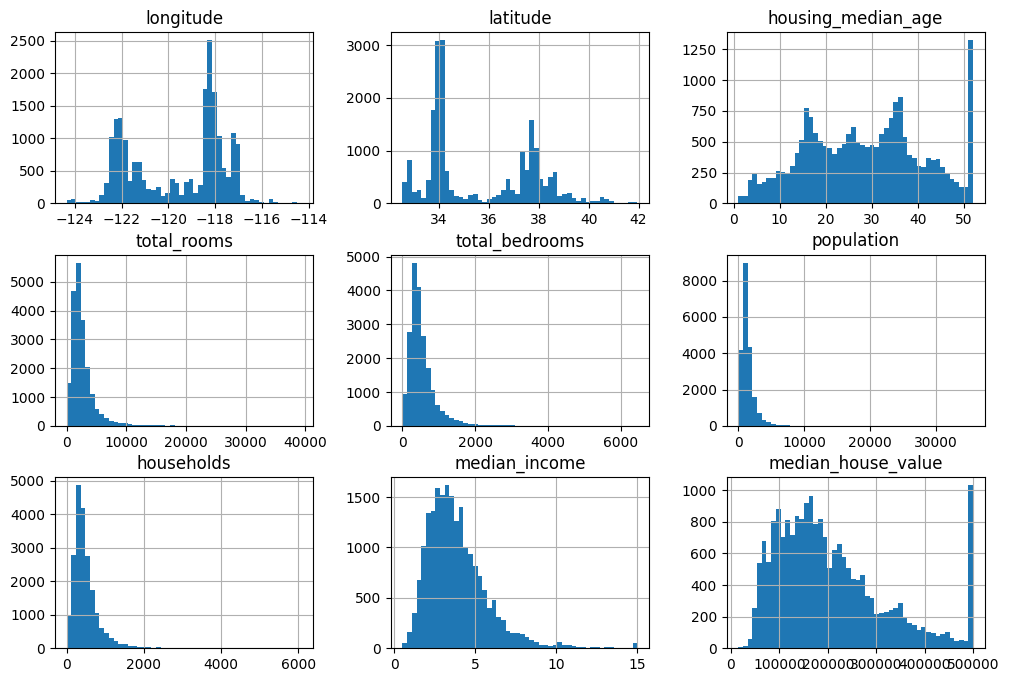

In [47]:
housing_full.hist(bins=50, figsize=(12,8))

plt.show()

* Some distributions are Right skewed As a result some models may struggle to find patterns for such data distribution.

#### Create a Test Set

In [48]:
from sklearn.model_selection import train_test_split
import numpy as np

* based on the convo with the client we found that income distribution really matters. So, it is better to use stratified sampling instead of random sampling.

* If you split train/test randomly, some income groups may disappear or be under-represented.

In [49]:
housing_full.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [69]:
# Lets create our category for median income for stratified sampling.

housing_full["income_cat"] = pd.cut(housing_full["median_income"],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])

In [51]:
housing_full["income_cat"].head()

0    5
1    5
2    5
3    4
4    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [54]:
cat_counts = housing_full["income_cat"].value_counts().sort_index()
cat_counts

income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

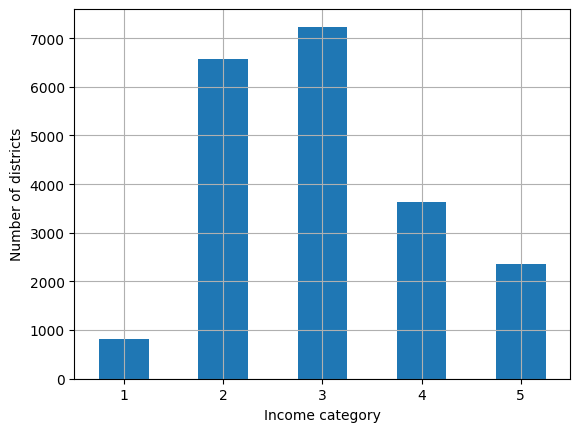

In [91]:
cat_counts.plot(kind="bar" ,rot=0, grid=True)
# Plotting with rot=0 to ensure x-tick labels are horizontal. It is a degree based measurement. Can be 45, 30, 90....

plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [70]:
housing_full.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [84]:
# Stratified Sampling.
# focus on stratify

strat_train_set, strat_test_set = train_test_split(housing_full, test_size=0.2, random_state=42, stratify=housing_full["income_cat"])

In [81]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


In [82]:
strat_train_set.shape

(16512, 11)

In [76]:
strat_test_set.shape

(4128, 11)

In [93]:
# Check test set size
strat_test_set.shape[0]/housing_full.shape[0]

0.2

## Data Visualization to Gain Insights

In [96]:
housing = strat_train_set.copy() # housing represents training data set. Including both freatues and labels

### Visualize Geographical Data

In [95]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


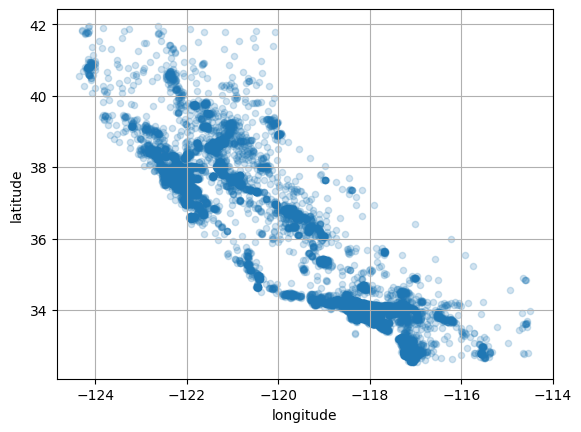

In [97]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, grid=True)

plt.show()

* It looks like California - the dataset is for houses in california, that is why!
* high population around the beach, and this makes sense.

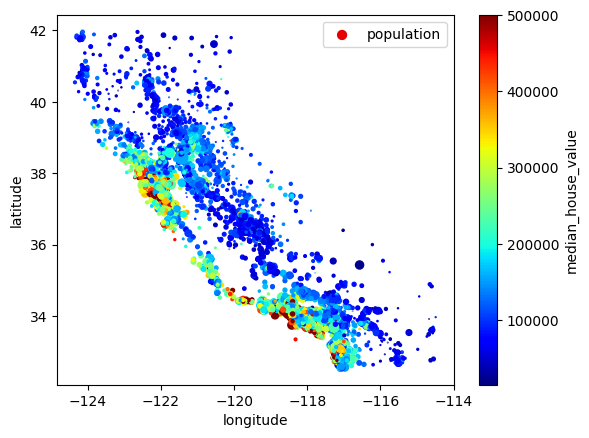

In [105]:
housing.plot(kind="scatter", x="longitude", y="latitude",
             s=housing["population"]/200, label="population",
             c="median_house_value", cmap="jet")

plt.show()

# Color (c): Represents the median house price (red = high, blue = low).
# Size (s): Represents the population of the district.
# Colormap (cmap): jet makes it easy to visualize high-value, dense, or coastal areas.

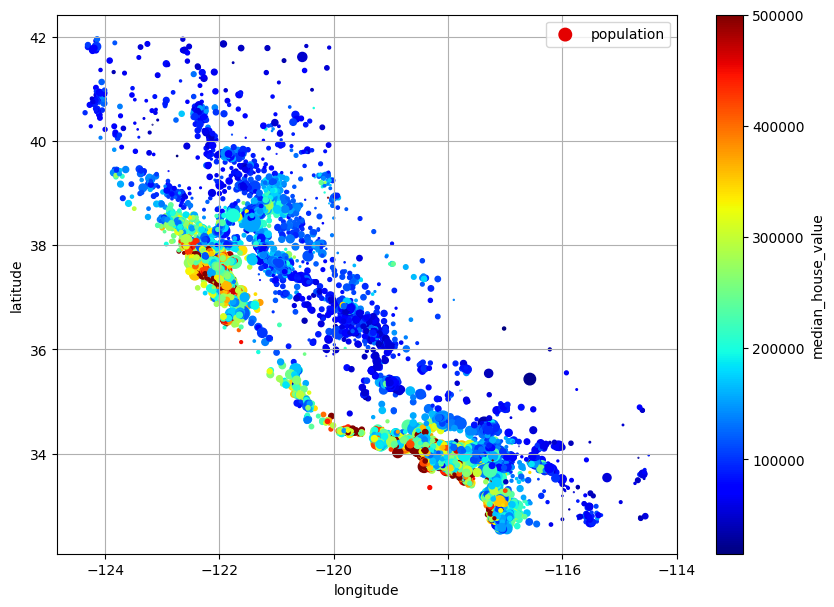

In [107]:
# just graph compartion

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10,7))

plt.show()

### Correlations

In [ ]:
housing.corr(numeric_only=True)

In [ ]:
corr_matrix = housing.corr(numeric_only=True)["median_house_value"]
corr_matrix

In [ ]:
corr_matrix.sort_values(ascending=False)

* median income has a strong correlation

In [ ]:
from pandas.plotting import scatter_matrix

# lets go crazy

scatter_matrix(housing)

plt.show()

Oh, no!

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

plt.show()

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value")

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2, grid=True)

* there are are horizontal lines around 500k, 450k, 275k, 230k.....

## Prepare the Data for Machine Learning Algorithms

* lets separate the "predictors" and the "labels"

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1) # X_train
housing_labels = strat_train_set["median_house_value"].copy() # y_train

In [ ]:
housing.head(2)

In [ ]:
housing_labels.head()

### Clean Data

* Missing values

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
# only numerical values have median

housing_num = housing.select_dtypes(include="number")

In [ ]:
housing_num.head(2)

In [ ]:
imputer.fit(housing_num)

In [ ]:
housing_num.isna().sum()

In [ ]:
imputer.statistics_

In [ ]:
housing_num_filled = imputer.transform(housing_num)

In [ ]:
housing_num_filled

In [ ]:
housing_tr = pd.DataFrame(housing_num_filled, columns=housing_num.columns, index=housing_num.index)

In [ ]:
housing_tr.head(1) # Yo, it is pd df again!

### Handling Categorical Attributes

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

In [ ]:
housing_cat["ocean_proximity"].unique()

In [ ]:
# Note: ordinal encoder is great for order based categories and it is not reocmmended of non ordered based categories like cities

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_encoded

In [ ]:
ordinal_encoder.categories_

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_1hot

In [ ]:
#use .toarray() method to convert the sparse matrix to a NumPy array. note that NumPy array is heavier.

housing_cat_1hot.toarray()

Alternatively, you can set sparse_output=False when creating the OneHotEncoder (note: the sparse hyperparameter was renamned to sparse_output in Scikit-Learn 1.2)

In [ ]:
cat_encoder.categories_

### Feature Scaling and Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)


In [ ]:
housing_num_min_max_scaled

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [ ]:
housing_num_std_scaled

In [ ]:
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)

some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data
scaled_predictions = model.predict(some_new_data)

predictions = target_scaler.inverse_transform(scaled_predictions)

In [ ]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
transformer=StandardScaler())

model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

### Transfomation Pipelines

In [ ]:
# a small pipeline for numerical attributes

from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("standardized", StandardScaler()),
])

num_pipeline

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
    #why handle_unknown?
)


preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared

In [ ]:
preprocessing.get_feature_names_out()